## Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0)
    return df, None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0, index_col=0)
    y = df["target"]
    return df.drop("target", axis=1), y

In [3]:
COVID_DATA_PATH = "hw1_data/covid.csv" # YOUR_CODE
HR_DATA_PATH = "hw1_data/hr.csv" # YOUR_CODE 

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

print(X_hr, y_hr)

                 city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   
...               ...                     ...    ...                      ...   
7386         city_173                   0.878   Male   No relevent experience   
31398        city_103                   0.920   Male  Has relevent experience   
24576        city_103                   0.920   Male  Has relevent experience   
5756          city_65                   0.802   Male  Has relevent experience   
23834         city_67       

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')


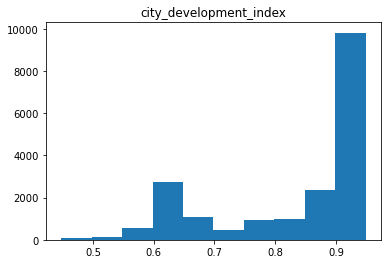

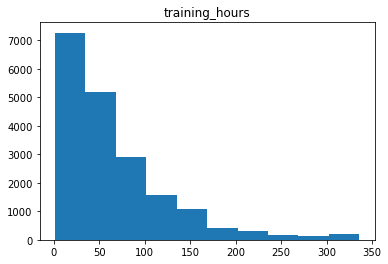

gender {'Male': 13221, nan: 4508, 'Female': 1238, 'Other': 191}
relevent_experience {'Has relevent experience': 13792, 'No relevent experience': 5366}
enrolled_university {'no_enrollment': 13817, 'Full time course': 3757, nan: 386, 'Part time course': 1198}
education_level {'Graduate': 11598, 'Masters': 4361, 'High School': 2017, nan: 460, 'Phd': 414, 'Primary School': 308}
major_discipline {'STEM': 14492, 'Business Degree': 327, nan: 2813, 'Arts': 253, 'Humanities': 669, 'No Major': 223, 'Other': 381}
experience {'>20': 3286, '15': 686, '5': 1430, '<1': 522, '11': 664, '13': 399, '7': 1028, '17': 342, '2': 1127, '16': 508, '1': 549, '4': 1403, '10': 985, '14': 586, '18': 280, '19': 304, '12': 494, '3': 1354, '6': 1216, '9': 980, '8': 802, '20': 148, nan: 65}
company_size {nan: 5938, '50-99': 3083, '<10': 1308, '10000+': 2019, '5000-9999': 563, '1000-4999': 1328, '10/49': 1471, '100-500': 2571, '500-999': 877}
company_type {nan: 6140, 'Pvt Ltd': 9817, 'Funded Startup': 1001, 'Early Sta

<Figure size 432x288 with 0 Axes>

In [5]:
# YOUR_CODE
print(X_hr.columns)

def get_distr(df):
    numeric = ['city_development_index', 'training_hours']
    categorical = ['gender',
           'relevent_experience', 'enrolled_university', 'education_level',
           'major_discipline', 'experience', 'company_size', 'company_type',
           'last_new_job']

    for f in numeric:
        if f in df.columns:
            plt.hist(df[f])
            plt.title(f)
            plt.show()
            plt.clf()

    for f in categorical:
        if f in df.columns:
            d = dict()
            for i in df[f]:
                if i not in d:
                    d[i] = 0
                d[i] += 1
            print(f, d)
        
get_distr(X_hr)

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [6]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [7]:
X_hr_dropna = X_hr.dropna()# YOUR_CODE

In [8]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')

Pазмер датасета hr без NaN 8955


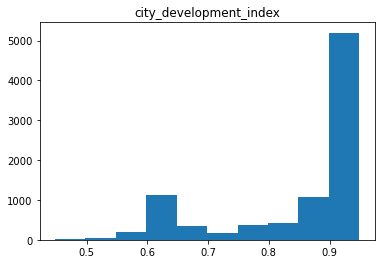

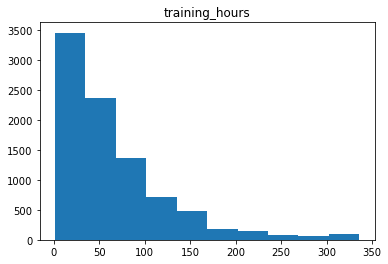

gender {'Male': 8073, 'Female': 804, 'Other': 78}
relevent_experience {'No relevent experience': 1104, 'Has relevent experience': 7851}
enrolled_university {'no_enrollment': 7594, 'Part time course': 529, 'Full time course': 832}
education_level {'Graduate': 6252, 'Masters': 2449, 'Phd': 254}
major_discipline {'STEM': 7989, 'Humanities': 378, 'Business Degree': 170, 'Other': 177, 'No Major': 112, 'Arts': 129}
experience {'15': 398, '>20': 1881, '13': 235, '7': 485, '5': 575, '16': 304, '11': 372, '<1': 97, '18': 168, '19': 179, '12': 293, '10': 551, '9': 533, '2': 297, '6': 535, '4': 480, '14': 333, '3': 428, '8': 398, '17': 206, '20': 86, '1': 121}
company_size {'50-99': 1986, '<10': 840, '5000-9999': 393, '1000-4999': 930, '10/49': 951, '100-500': 1814, '10000+': 1449, '500-999': 592}
company_type {'Pvt Ltd': 6794, 'Funded Startup': 784, 'Early Stage Startup': 385, 'Public Sector': 564, 'NGO': 356, 'Other': 72}
last_new_job {'>4': 1965, '4': 599, '1': 3838, '3': 610, '2': 1570, 'neve

<Figure size 432x288 with 0 Axes>

In [9]:
get_distr(X_hr_dropna)

Датасет уменьшился больше чем в два раза. Людей с опытом стало значительно больше, все стали с высшим образованием, распределение признаков изменилось.

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

Удаляем строки там где мало nan значений. Остальные заполняем отдельной категорией, чтобы не вносить искажения в данные.

In [10]:
def fill_na(X, y):
    values = {'gender': 'empty', 'major_discipline': 'empty', 'company_size': 'empty', 'company_type': 'empty'}
    X_fill = X.fillna(value=values)
    X_fill = X_fill.dropna()
    #print(X_fill.index.values)
    y_fill = y[y.index.isin(X_fill.index.values)]
    # Возвращает данные без NaN значений
    return X_fill, y_fill

In [11]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)
print(len(X_hr_fill), len(y_hr_fill))

18014 18014


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

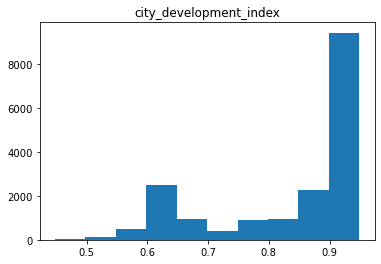

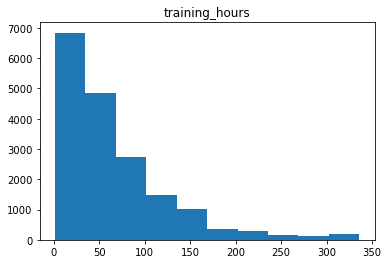

gender {'Male': 12772, 'empty': 3863, 'Female': 1206, 'Other': 173}
relevent_experience {'Has relevent experience': 13190, 'No relevent experience': 4824}
enrolled_university {'no_enrollment': 13348, 'Full time course': 3517, 'Part time course': 1149}
education_level {'Graduate': 11188, 'Masters': 4228, 'High School': 1908, 'Phd': 399, 'Primary School': 291}
major_discipline {'STEM': 13993, 'empty': 2222, 'Arts': 248, 'Humanities': 653, 'Business Degree': 322, 'No Major': 212, 'Other': 364}
experience {'>20': 3182, '15': 668, '5': 1337, '11': 649, '13': 387, '7': 982, '17': 331, '2': 997, '16': 488, '1': 475, '4': 1298, '10': 946, '<1': 451, '14': 569, '18': 273, '19': 294, '12': 475, '6': 1143, '9': 936, '3': 1223, '8': 768, '20': 142}
company_size {'empty': 5310, '50-99': 2950, '<10': 1242, '10000+': 1964, '5000-9999': 542, '1000-4999': 1282, '10/49': 1394, '100-500': 2483, '500-999': 847}
company_type {'empty': 5476, 'Pvt Ltd': 9475, 'Funded Startup': 975, 'Early Stage Startup': 562

<Figure size 432x288 with 0 Axes>

In [12]:
# YOUR_CODE
get_distr(X_hr_fill)

Датасет уменьшился на 6%, при этом относительные распределения исходных значений признаков сохранились.

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

Bahrain


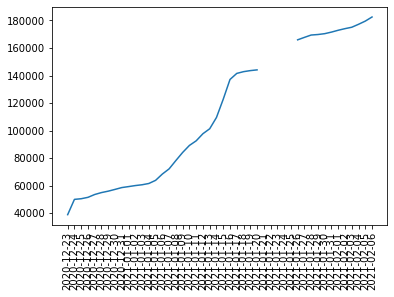

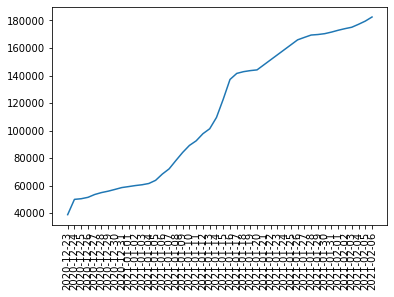

<Figure size 432x288 with 0 Axes>

In [13]:
# YOUR_CODE
d = dict()
for i in X_covid['country']:
    if i not in d:
        d[i] = 0
    d[i] += 1
    
key = None
for k, v in d.items():
    if v == 46:
        print(k)
        key = k
        
dat = X_covid[X_covid['country'] == key].copy()
plt.plot(dat['date'], dat['total_vaccinations'])
plt.xticks(rotation=90)
plt.show()
plt.clf()

start = dat.loc[dat['date']=='2021-01-26', 'total_vaccinations'].iloc[0]
end = dat.loc[dat['date']=='2021-01-20', 'total_vaccinations'].iloc[0]
delta = (start - end) / 6

dat.loc[dat['date']=='2021-01-21', 'total_vaccinations'] = end + delta * 1
dat.loc[dat['date']=='2021-01-22', 'total_vaccinations'] = end + delta * 2
dat.loc[dat['date']=='2021-01-23', 'total_vaccinations'] = end + delta * 3
dat.loc[dat['date']=='2021-01-24', 'total_vaccinations'] = end + delta * 4
dat.loc[dat['date']=='2021-01-25', 'total_vaccinations'] = end + delta * 5


plt.plot(dat['date'], dat['total_vaccinations'])
plt.xticks(rotation=90)
plt.show()
plt.clf()

Вид первого графика предполагает линейную динамику изменения признака, поэтому данные заполнены линейной интерполяцией

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [14]:
# YOUR_CODE

Исходя из распределения значений признаков и возможных диапазонов значений, выбросы в данных не обнаружены

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [15]:
from sklearn.preprocessing import LabelBinarizer as LB
from sklearn.preprocessing import OneHotEncoder as OHE

def encode(X):
    # Возвращает данные без категориальных признаков
    #print(X.columns)
    ohe_df = X[['gender', 'relevent_experience', 'major_discipline', 'enrolled_university', 'company_type']].copy()
    ohe = OHE(sparse=False).fit(ohe_df)
    cols = [j for i in ohe.categories_ for j in i]
    ohe_df = pd.DataFrame(ohe.transform(ohe_df.values), columns=cols, index=X.index)
    #print(ohe_df.shape)
    
    lbl_df = X[['city', 'city_development_index', 'education_level', 
       'experience', 'company_size', 'last_new_job', 'training_hours']].copy()
    d = dict(zip(list(set(lbl_df.loc[:, 'city'])), range(len(list(set(lbl_df.loc[:, 'city']))))))
    lbl_df["city"].replace(d, inplace=True)
    d = {'Graduate': 2, 'Masters': 3, 'High School': 1, 'Phd': 4, 'Primary School': 0}
    lbl_df["education_level"].replace(d, inplace=True)
    d = {'>20': 21, '<1': 0}
    lbl_df["experience"].replace(d, inplace=True)
    d = {'empty': 0, '50-99': 3, '<10': 1, '10000+': 8, '5000-9999': 7, '1000-4999': 6, '10/49': 2, '100-500': 4, '500-999': 5}
    lbl_df["company_size"].replace(d, inplace=True)
    d = {'never': 0, '>4': 5}
    lbl_df["last_new_job"].replace(d, inplace=True)
    #print(lbl_df.shape)
    X_encode = pd.concat([ohe_df, lbl_df], axis=1)
    return X_encode

In [16]:
X_hr_encode = encode(X_hr_fill)
print(X_hr_encode)

             Female  Male  Other  empty  Has relevent experience  \
enrollee_id                                                        
8949            0.0   1.0    0.0    0.0                      1.0   
29725           0.0   1.0    0.0    0.0                      0.0   
11561           0.0   0.0    0.0    1.0                      0.0   
666             0.0   1.0    0.0    0.0                      1.0   
21651           0.0   0.0    0.0    1.0                      1.0   
...             ...   ...    ...    ...                      ...   
7386            0.0   1.0    0.0    0.0                      0.0   
31398           0.0   1.0    0.0    0.0                      1.0   
24576           0.0   1.0    0.0    0.0                      1.0   
5756            0.0   1.0    0.0    0.0                      1.0   
23834           0.0   0.0    0.0    1.0                      0.0   

             No relevent experience  Arts  Business Degree  Humanities  \
enrollee_id                              

Городов слишком много для OHE, поэтому label. В образовании есть ранжирование, поэтому label. Там где в основном числа (размер компании, опыт) тоже есть ранжирование, поэтому label. Остальное, где нет ранжирования и не очень много значений, OHE.

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [17]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    zeros = len(y[y==0.])
    ones = len(y[y==1.])
    print(zeros, ones)
    X_under = pd.DataFrame(columns = X.columns)
    y_under = []
    zeros = ones = min(zeros, ones)
    for (ind, i), j in zip(X.iterrows(), y):
        if j == 0 and zeros > 0:
            X_under = X_under.append(i)
            y_under.append(j)
            zeros -= 1
        if j == 1 and ones > 0:
            X_under = X_under.append(i)
            y_under.append(j)
            ones -= 1
    print(X_under.shape, len(y_under))
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    zeros = len(y[y==0.])
    ones = len(y[y==1.])
    print(zeros, ones)
    X_over = pd.DataFrame(columns = X.columns)
    y_over = []
    zeros = ones = max(zeros, ones)
    while (zeros > 0 or ones > 0):
        for (ind, i), j in zip(X.iterrows(), y):
            if j == 0 and zeros > 0:
                X_over = X_over.append(i)
                y_over.append(j)
                zeros -= 1
            if j == 1 and ones > 0:
                X_over = X_over.append(i)
                y_over.append(j)
                ones -= 1
    print(X_over.shape, len(y_over))
    
    return X_over, y_over

In [18]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

13593 4421
(8842, 30) 8842
13593 4421
(27186, 30) 27186


#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [19]:
#!pip install -U imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=239)# YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode.values, y_hr_fill.values)# YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

13593 4421
(8842, 12) 8842


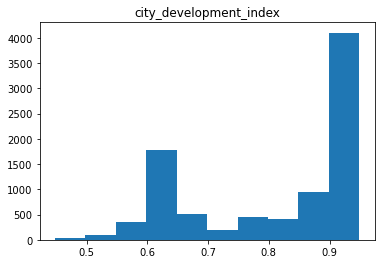

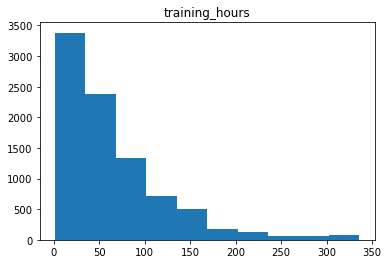

gender {'Male': 6148, 'empty': 1993, 'Female': 604, 'Other': 97}
relevent_experience {'Has relevent experience': 6128, 'No relevent experience': 2714}
enrolled_university {'no_enrollment': 6201, 'Full time course': 2081, 'Part time course': 560}
education_level {'Graduate': 5716, 'Masters': 1950, 'High School': 883, 'Phd': 173, 'Primary School': 120}
major_discipline {'STEM': 6955, 'empty': 1013, 'Arts': 125, 'Humanities': 305, 'Business Degree': 158, 'No Major': 103, 'Other': 183}
experience {'>20': 1333, '15': 299, '5': 705, '11': 327, '13': 164, '7': 531, '17': 132, '2': 571, '16': 202, '1': 286, '4': 704, '10': 430, '<1': 287, '14': 257, '18': 113, '19': 123, '12': 215, '6': 589, '9': 465, '3': 688, '8': 348, '20': 73}
company_size {'empty': 3211, '50-99': 1310, '<10': 537, '10000+': 884, '5000-9999': 240, '1000-4999': 574, '10/49': 654, '100-500': 1055, '500-999': 377}
company_type {'empty': 3243, 'Pvt Ltd': 4214, 'Funded Startup': 426, 'Early Stage Startup': 254, 'Other': 53, 'Pu

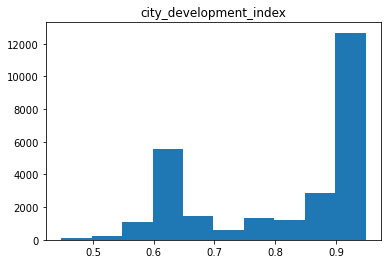

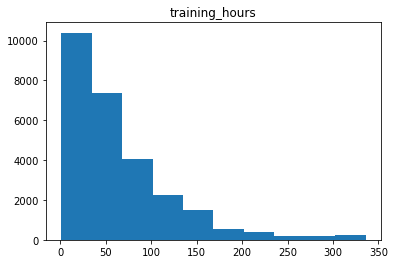

gender {'Male': 18798, 'empty': 6263, 'Female': 1860, 'Other': 265}
relevent_experience {'Has relevent experience': 18949, 'No relevent experience': 8237}
enrolled_university {'no_enrollment': 19170, 'Full time course': 6286, 'Part time course': 1730}
education_level {'Graduate': 17567, 'Masters': 6055, 'High School': 2678, 'Phd': 515, 'Primary School': 371}
major_discipline {'STEM': 21452, 'empty': 3088, 'Arts': 354, 'Humanities': 929, 'Business Degree': 492, 'No Major': 318, 'Other': 553}
experience {'>20': 4192, '15': 896, '5': 2141, '11': 954, '13': 539, '7': 1586, '17': 446, '2': 1692, '16': 619, '1': 881, '4': 2176, '10': 1359, '<1': 876, '14': 780, '18': 355, '19': 395, '12': 648, '6': 1820, '9': 1347, '3': 2119, '8': 1154, '20': 211}
company_size {'empty': 9891, '50-99': 4022, '<10': 1662, '10000+': 2722, '5000-9999': 743, '1000-4999': 1666, '10/49': 2040, '100-500': 3294, '500-999': 1146}
company_type {'empty': 9992, 'Pvt Ltd': 12940, 'Funded Startup': 1265, 'Early Stage Start

<Figure size 432x288 with 0 Axes>

In [23]:
# YOUR CODE
#print(X_hr_SMOTE)
X_hr_under, y_hr_under = undersampling(X_hr_fill, y_hr_fill)
get_distr(X_hr_under)

X_hr_over, y_hr_over = oversampling(X_hr_fill, y_hr_fill)
get_distr(X_hr_over)

При использовании undersampling относительное распределение признаков сохранилось, но при этом датасет уменьшился в два раза.
При использовании oversampig заметны изменения в относительном распределении признаков в категориях.